V souboru s daty na Slacku máš data o hodnotách finančních indikátorů 100 největších společností obchodovaných na americké burze. Naším cílem je zjistit, které indikátory nejvíce ovlivňují cenu, a vytvořit model, který odhadne cenu akcie na základě hodnot finančních indikátorů.

Jeden z indikátorů je označený jako Y a je poměrem ceny a účetní hodnoty akcie. Hodnota indikátoru je odrazem ceny akcie. Ostatní indikátory jso následující:

běžná likvidita (Current Ratio, CR),
zadluženost (Debt to Assets, DA),
finanční páka (Financial Leverage, FL)
provozní zisková marže (Operating Profit Margin, OPM),
obrat pohledávek (Receivables Turnover, RT),
obrat celkových aktiv (Total Assets Turnover, TAT).
Úkol můžeš odevzdat jako Jupyter notebook.
Nenahrávej prosím datový soubor na GitHub (neobsahuje veřejně dostupná data). Ze stejného důvodu jsou data anonymizovaná, tj. není v nich obsažen konkrétní název firmy.

In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = pd.read_csv("df.csv")
data

,Company,CR,DA,FL,OPM,RT,TAT,DE,Y,PT,Sector
0,2Q3DU,1.19,0.20,2.21,0.0770,6.66,0.40,0.43,1.95,5.93,Industrials
1,46JNq,0.29,0.64,10.14,0.2037,20.04,0.36,6.52,7.26,43.48,Communication Services
2,4ISOt,2.93,0.04,1.43,0.3055,6.55,0.72,0.06,7.78,18.38,Communication Services
3,5AWwu,1.03,0.25,3.55,0.0708,146.43,1.80,0.88,6.17,5.15,Consumer Defensive
4,5hbZR,1.20,0.47,0.00,0.1677,30.92,0.93,0.00,0.00,17.06,Consumer Cyclical
...,...,...,...,...,...,...,...,...,...,...,...
95,yhCH3,1.50,0.37,2.33,0.2557,4.92,0.41,0.85,5.18,6.83,Healthcare
96,YqdX2,0.70,0.27,2.57,0.2363,16.11,0.64,0.69,7.40,2.70,Consumer Defensive
97,yUjyz,1.49,0.12,2.36,0.2576,8.64,0.51,0.28,5.99,7.59,Technology
98,YX515,2.30,0.64,25.03,0.3758,7.48,0.31,16.08,41.57,10.54,Technology


Část 1
Vytvoř korelační matici a podívej se, který ukazatel má největší vliv na indikátor Y akcie.

In [4]:
selekce = ['Y', 'CR', 'DA', 'FL', 'OPM', 'RT', 'TAT']
relevantni_data = data[selekce]
relevantni_data

,Y,CR,DA,FL,OPM,RT,TAT
0,1.95,1.19,0.20,2.21,0.0770,6.66,0.40
1,7.26,0.29,0.64,10.14,0.2037,20.04,0.36
2,7.78,2.93,0.04,1.43,0.3055,6.55,0.72
3,6.17,1.03,0.25,3.55,0.0708,146.43,1.80
4,0.00,1.20,0.47,0.00,0.1677,30.92,0.93
...,...,...,...,...,...,...,...
95,5.18,1.50,0.37,2.33,0.2557,4.92,0.41
96,7.40,0.70,0.27,2.57,0.2363,16.11,0.64
97,5.99,1.49,0.12,2.36,0.2576,8.64,0.51
98,41.57,2.30,0.64,25.03,0.3758,7.48,0.31


In [5]:
matice = relevantni_data.corr()
matice

,Y,CR,DA,FL,OPM,RT,TAT
Y,1.000000,-0.018690,0.164599,0.759323,0.051308,-0.046290,0.301222
CR,-0.018690,1.000000,-0.225917,-0.179232,0.284529,-0.151203,-0.123665
DA,0.164599,-0.225917,1.000000,0.340320,0.015032,0.206620,-0.083691
FL,0.759323,-0.179232,0.340320,1.000000,-0.112430,-0.076335,0.156169
OPM,0.051308,0.284529,0.015032,-0.112430,1.000000,0.051672,-0.298701
RT,-0.046290,-0.151203,0.206620,-0.076335,0.051672,1.000000,0.206580
TAT,0.301222,-0.123665,-0.083691,0.156169,-0.298701,0.206580,1.000000


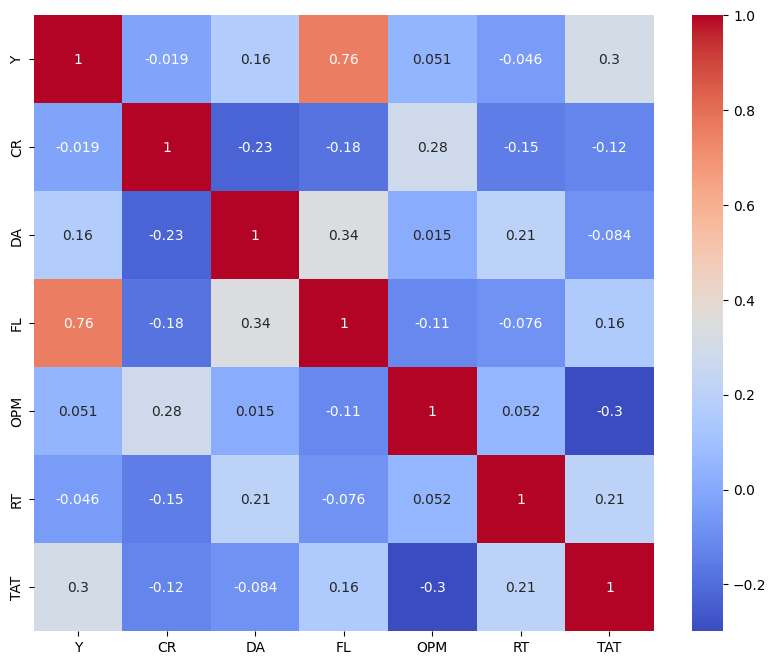

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(matice, annot=True, cmap='coolwarm')
plt.show()

### Jedná se o ukazatel "finanční páka (Financial Leverage, FL)"

Vytvoř regresní model, který bude mít koeficient Y jako vysvětlovanou proměnnou. Do modelu vlož hodnoty ostatních indikátorů jako vysvětlující proměnné.

S využitím modulu statsmodels vytvoř regresní model a zobraz si tabulku se souhrnem významů. Podívej se na hodnoty koeficientů a na výsledky testu statistické významnosti koeficientů. Pokud je některý koeficient (nebo více koeficientů) nevýznamný, sestav nový model bez tohoto koeficientů (případně beze všech nevýznamných koeficientů).

Pro všechna data odhadni ukazatel Y s využitím tvého modelu a odhadnuté ceny vlož do původní tabulky s daty. Dále vypočítej rozdíl mezi odhadem koeficientu a jeho skutečnou hodnotou. Najdi akcii, kde je tento rozdíl největší (tj. hledáme akcii, které náš model predikuje výrazně vyšší cenu než jaká je ve skutečnosti, tato akcie je potenciálně na trhu podhodnocená).

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [8]:
import statsmodels.api as sm

relevantni_data = sm.add_constant(relevantni_data)

X = relevantni_data[['const', 'CR', 'DA', 'FL', 'OPM', 'RT', 'TAT']]
Y = relevantni_data['Y']

model = sm.OLS(Y, X).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     30.43
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.00e-20
Time:                        15:53:25   Log-Likelihood:                -376.22
No. Observations:                 100   AIC:                             766.4
Df Residuals:                      93   BIC:                             784.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6707      4.082     -2.614      0.0

In [9]:
relevantni_data = sm.add_constant(relevantni_data)

X = relevantni_data[['const', 'FL', 'OPM', 'TAT']]
Y = relevantni_data['Y']

model = sm.OLS(Y, X).fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     59.51
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           7.99e-22
Time:                        15:53:28   Log-Likelihood:                -377.99
No. Observations:                 100   AIC:                             764.0
Df Residuals:                      96   BIC:                             774.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4188      2.865     -3.637      0.0

In [19]:
relevantni_data['Y_pred'] = model.predict(X)

relevantni_data['Difference'] = relevantni_data['Y_pred'] - relevantni_data['Y']

max_difference_row = relevantni_data.loc[relevantni_data['Difference'].idxmax()]

print("Akcie s největším rozdílem:")
print(max_difference_row)

Akcie s největším rozdílem:
const          1.000000
Y              6.970000
CR             0.760000
DA             0.370000
FL            18.640000
OPM            0.063100
RT            12.440000
TAT            0.410000
Y_pred        41.779545
Difference    34.809545
Name: 79, dtype: float64
